## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Importing Libraries</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">loading data</div>

In [2]:
df = pd.read_csv('housing_price_dataset.csv')

# Display the first few rows of the dataset
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SquareFeet,50000.0,2006.374680,575.513241,1000.000000,1513.000000,2007.000000,2506.000000,2999.000000
Bedrooms,50000.0,3.498700,1.116326,2.000000,3.000000,3.000000,4.000000,5.000000
Bathrooms,50000.0,1.995420,0.815851,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,50000.0,1985.404420,20.719377,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000
Price,50000.0,224827.325151,76141.842966,-36588.165397,169955.860225,225052.141166,279373.630052,492195.259972


In [5]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [6]:
df.duplicated().sum()

0

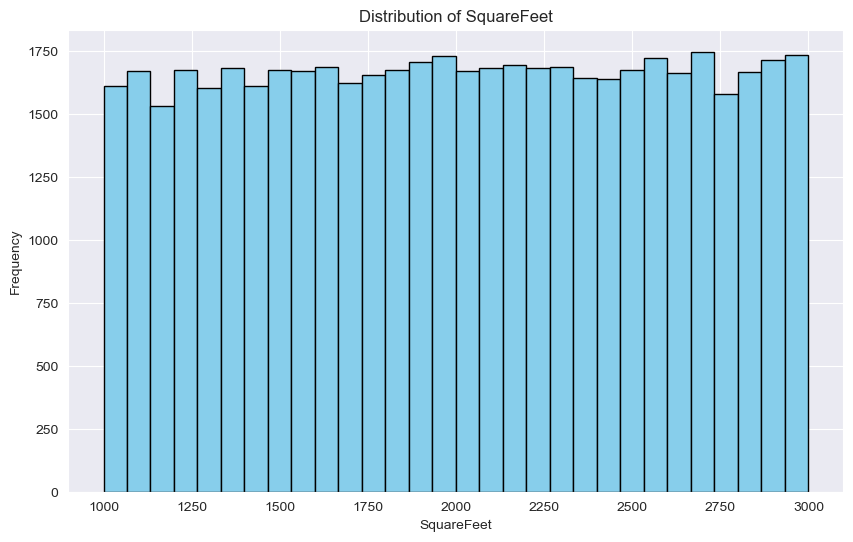

In [7]:
#Plot a histogram to visualize the distribution of square footage

plt.figure(figsize=(10, 6))
plt.hist(df['SquareFeet'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of SquareFeet')
plt.xlabel('SquareFeet')
plt.ylabel('Frequency')
plt.show()


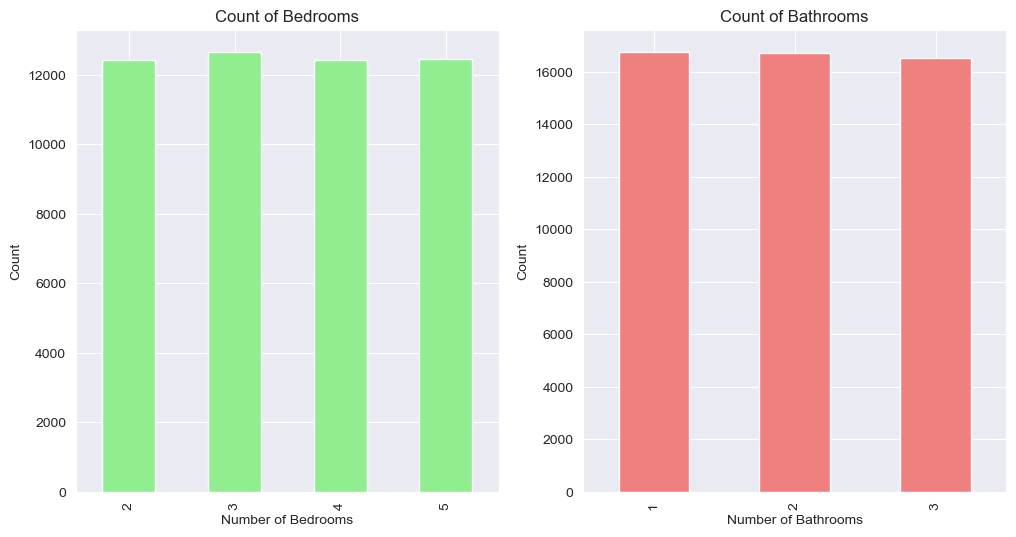

In [8]:
#Plot bar charts to show the count of bedrooms and bathrooms

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df['Bedrooms'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='lightgreen')
axes[0].set_title('Count of Bedrooms')
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Count')

df['Bathrooms'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Count of Bathrooms')
axes[1].set_xlabel('Number of Bathrooms')
axes[1].set_ylabel('Count')

plt.show()


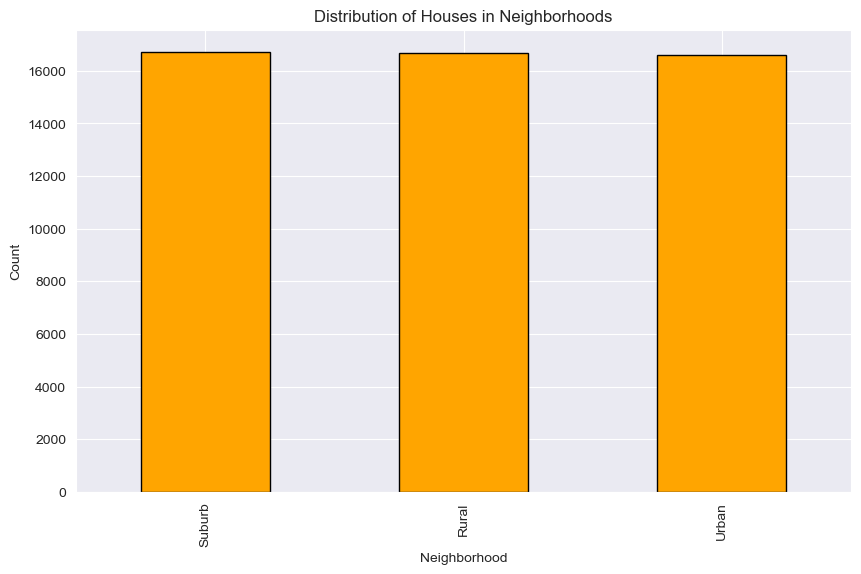

In [9]:
#Plot a bar chart to show the distribution of houses in different neighborhoods

plt.figure(figsize=(10, 6))
df['Neighborhood'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of Houses in Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.show()


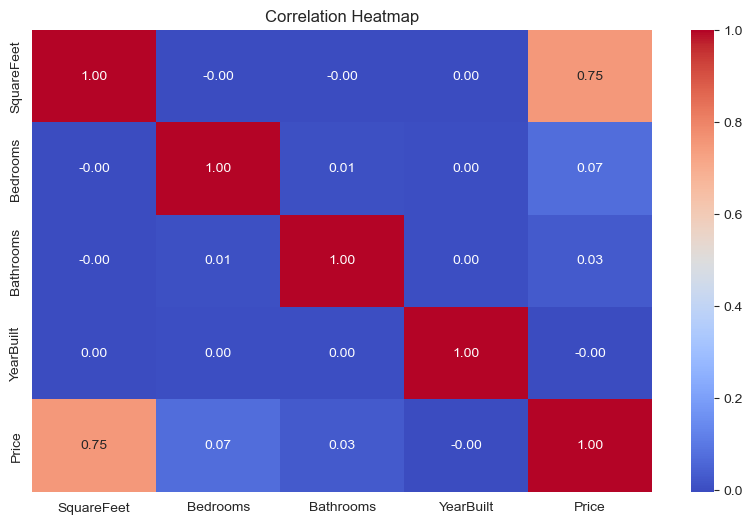

In [10]:
#Check the correlation between numerical features using a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


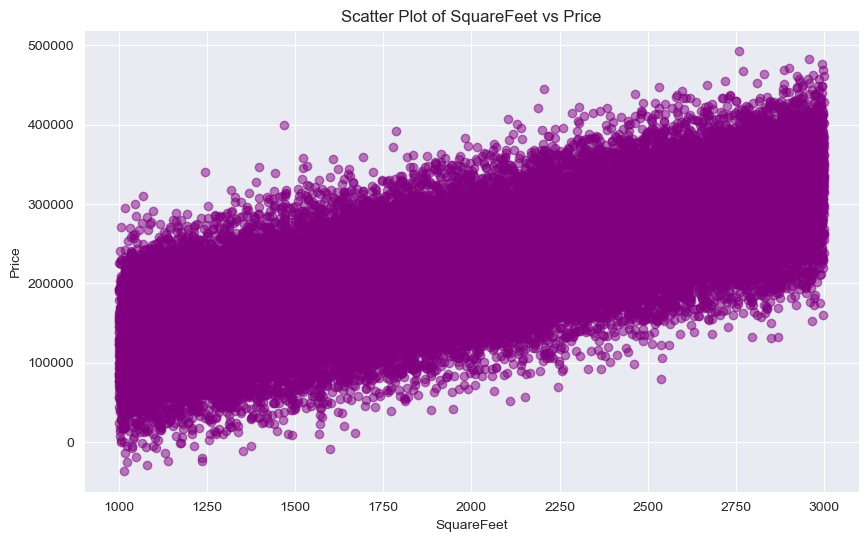

In [11]:
#Create scatter plots to visualize the relationship between 'SquareFeet' and 'Price

plt.figure(figsize=(10, 6))
plt.scatter(df['SquareFeet'], df['Price'], alpha=0.5, color='purple')
plt.title('Scatter Plot of SquareFeet vs Price')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.show()


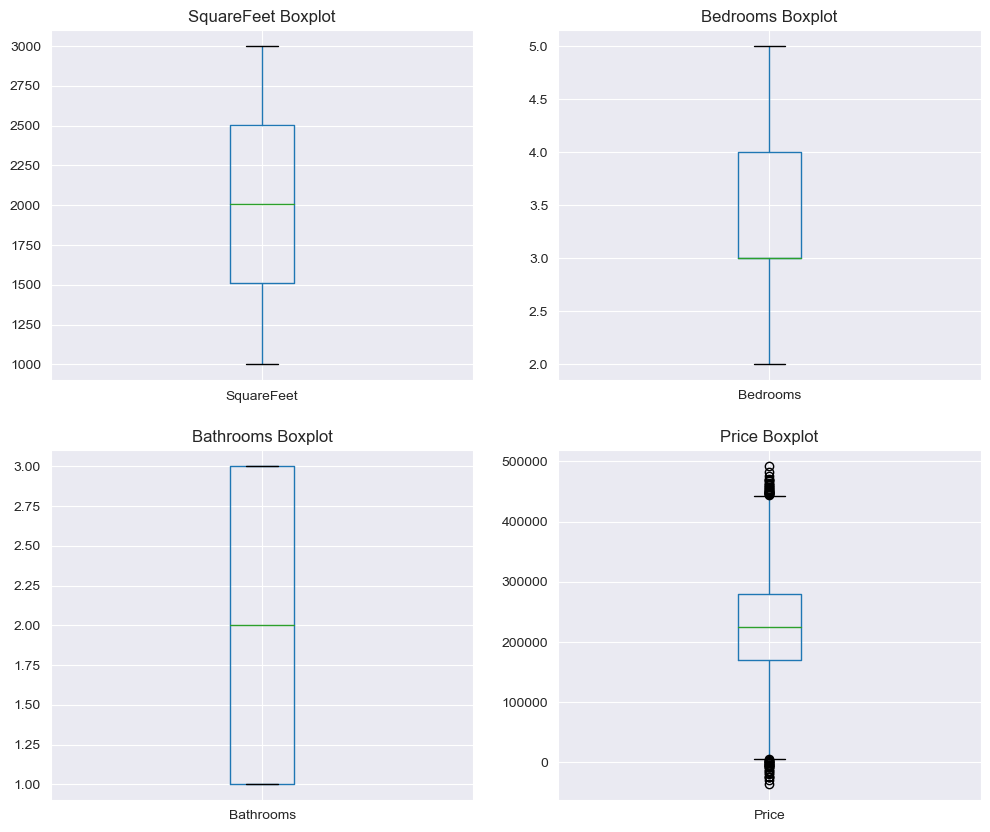

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

df.boxplot(column='SquareFeet', ax=axes[0, 0])
axes[0, 0].set_title('SquareFeet Boxplot')

df.boxplot(column='Bedrooms', ax=axes[0, 1])
axes[0, 1].set_title('Bedrooms Boxplot')

df.boxplot(column='Bathrooms', ax=axes[1, 0])
axes[1, 0].set_title('Bathrooms Boxplot')

df.boxplot(column='Price', ax=axes[1, 1])
axes[1, 1].set_title('Price Boxplot')

plt.show()


In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers for each column
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Impute outliers with the median
df_imputed = df.copy()
df_imputed.loc[outliers, 'Price'] = df['Price'].median()


In [14]:
Q1_imputed = df_imputed['Price'].quantile(0.25)
Q3_imputed = df_imputed['Price'].quantile(0.75)
IQR_imputed = Q3_imputed - Q1_imputed

# Identify outliers for the 'Price' column in the imputed DataFrame
outliers_imputed = ((df_imputed['Price'] < (Q1_imputed - 1.5 * IQR_imputed)) | (df_imputed['Price'] > (Q3_imputed + 1.5 * IQR_imputed)))

# Display rows with potential outliers in the imputed DataFrame
outliers_data_imputed = df_imputed[outliers_imputed]
print(outliers_data_imputed)


       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
15131        1178         4          2        Urban       2010    6124.032174
26024        2985         4          1       Suburb       1959  443335.494338


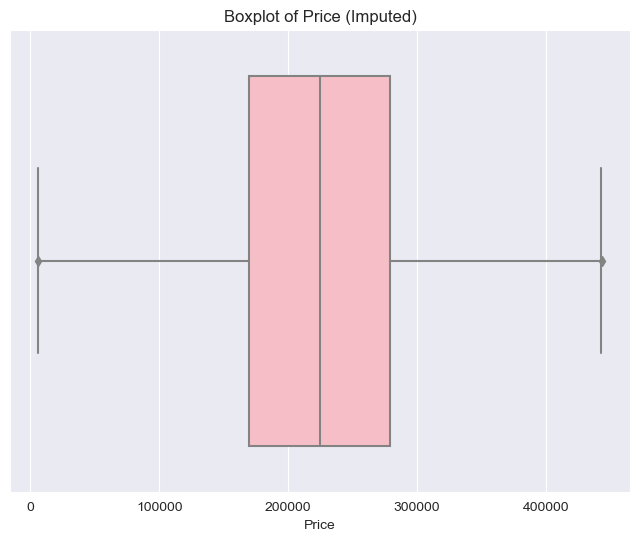

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Price'], color='lightpink')
plt.title('Boxplot of Price (Imputed)')
plt.xlabel('Price')
plt.show()


In [16]:
df=df_imputed.drop(columns='Neighborhood')

In [18]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
0,2126,4,1,1969,215355.283618
1,2459,3,2,1980,195014.221626
2,1860,2,1,1970,306891.012076
3,2294,2,1,1996,206786.787153
4,2130,5,2,2001,272436.239065


In [19]:
from sklearn.model_selection import train_test_split
y = df['Price']
X = df.drop(columns='Price') 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(40000, 4)

In [21]:
y_train.shape

(40000,)

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train, y_train)


y_pred = xg_reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred,squared=False)
print("RMSE:", rmse)

RMSE: 49634.737157951575


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you already have X_train, X_test, y_train, and y_test from the previous XGBoost example

# Create an instance of the RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=42)

# Fit the model to the training set
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_reg.predict(X_test)

# Calculate and print the RMSE (Root Mean Squared Error)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 49299.97804948973


In [25]:
import pandas as pd

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_XGBoost': y_pred,
    'Predicted_RandomForest': y_pred_rf
})

# Print the DataFrame
comparison_df


,Actual,Predicted_XGBoost,Predicted_RandomForest
33553,170835.035713,220873.328125,218581.169165
9427,126913.469998,141705.593750,131559.197347
199,246611.883092,254937.484375,252145.545812
12447,244250.462969,252030.218750,261993.248308
39489,271127.650112,272332.437500,283846.235014
...,...,...,...
28567,199265.817701,226413.484375,221352.978673
25079,241869.621812,201348.359375,197369.821970
18707,352184.123976,303629.156250,312917.257457
15200,244830.805238,202606.468750,195839.862641


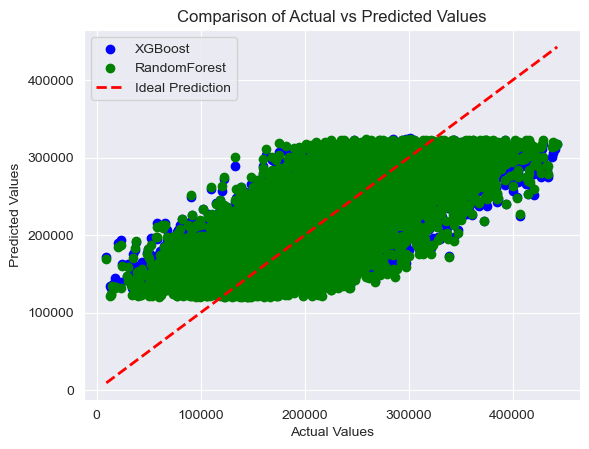

In [29]:
import matplotlib.pyplot as plt

# Scatter plot for XGBoost predictions
plt.scatter(comparison_df['Actual'], comparison_df['Predicted_XGBoost'], color='blue', label='XGBoost')
# Scatter plot for RandomForest predictions
plt.scatter(comparison_df['Actual'], comparison_df['Predicted_RandomForest'], color='green', label='RandomForest')

# Plot the line y=x for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error

# Assuming you already have X_train, X_test, y_train, and y_test from your dataset

# Create a Sequential model
model = models.Sequential()

# Add input layer and dense hidden layer
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add output layer with one neuron (regression problem)
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred_tf = model.predict(X_test).flatten()

# Calculate and print the RMSE (Root Mean Squared Error)
rmse_tf = mean_squared_error(y_test, y_pred_tf, squared=False)
print("TensorFlow RMSE:", rmse_tf)




Epoch 1/10

1000/1000 [==============================] - 4s 3ms/step - loss: 24036214784.0000 - val_loss: 3177321472.0000
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 3047901696.0000 - val_loss: 2948564992.0000
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2872448512.0000 - val_loss: 2765798144.0000
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2698578176.0000 - val_loss: 2624131584.0000
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2587502848.0000 - val_loss: 2555400192.0000
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2543376896.0000 - val_loss: 2537781504.0000
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2529739520.0000 - val_loss: 2534141696.0000
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2528801024.0000 - val_loss: 2537150720.0000
Epoch 9/10
1000/1000 [==============

In [28]:
# Make predictions on the test set using the trained TensorFlow model
y_pred_tf = model.predict(X_test).flatten()

# Create a DataFrame to compare actual and predicted values
comparison_df_tf = pd.DataFrame({
    'Actual': y_test,
    'Predicted_TensorFlow': y_pred_tf
})

# Print the DataFrame
comparison_df_tf


313/313 [==============================] - 1s 2ms/step


,Actual,Predicted_TensorFlow
33553,170835.035713,214392.171875
9427,126913.469998,126230.593750
199,246611.883092,250771.031250
12447,244250.462969,254685.828125
39489,271127.650112,288433.312500
...,...,...
28567,199265.817701,225126.359375
25079,241869.621812,197461.750000
18707,352184.123976,312084.875000
15200,244830.805238,192636.359375


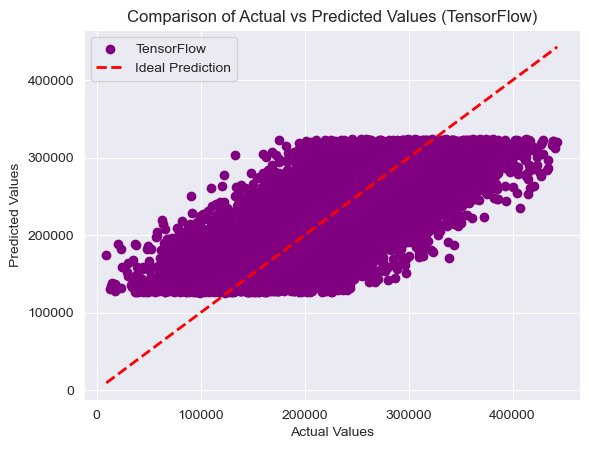

In [33]:
import matplotlib.pyplot as plt

# Scatter plot for TensorFlow predictions
plt.scatter(comparison_df_tf['Actual'], comparison_df_tf['Predicted_TensorFlow'], color='purple', label='TensorFlow')

# Plot the line y=x for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Actual vs Predicted Values (TensorFlow)')
plt.legend()
plt.show()
